In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/content/mhs Data for F7.csv')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130.0,80,15.0,98.0,86,high risk
1,35,140.0,90,13.0,98.0,Seventy,high risk
2,29,90.0,70,8.0,100.0,80,high risk
3,30,140.0,85,7.0,98.0,70,high risk
4,35,120.0,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
524,32,120.0,90,7.5,98.0,70,low risk
525,42,120.0,80,7.5,98.0,70,low risk
526,42,90.0,60,7.5,98.0,76,low risk
527,19,120.0,80,7.0,98.0,70,low risk


In [3]:
df.info

<bound method DataFrame.info of     Age  SystolicBP  DiastolicBP    BS  BodyTemp HeartRate  RiskLevel
0    25       130.0           80  15.0      98.0        86  high risk
1    35       140.0           90  13.0      98.0   Seventy  high risk
2    29        90.0           70   8.0     100.0        80  high risk
3    30       140.0           85   7.0      98.0        70  high risk
4    35       120.0           60   6.1      98.0        76   low risk
..   ..         ...          ...   ...       ...       ...        ...
524  32       120.0           90   7.5      98.0        70   low risk
525  42       120.0           80   7.5      98.0        70   low risk
526  42        90.0           60   7.5      98.0        76   low risk
527  19       120.0           80   7.0      98.0        70   low risk
528  15        78.0           49   7.5      98.0        77   low risk

[529 rows x 7 columns]>

In [4]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

**I need to clean Age, SystolicBP and BodyTemp**

In [5]:
df.isnull().sum()

Age            4
SystolicBP     3
DiastolicBP    0
BS             0
BodyTemp       4
HeartRate      0
RiskLevel      0
dtype: int64

**CLEANING AGE COLUMN**

In [6]:
df['Age'].unique()

array(['25', '35', '29', '30', 'Twenty', '23', '32', '42', '19', '20',
       '48', '15', '50', '10', '40', '21', '18', '16', '22', '49', '28',
       nan, '60', '55', '45', '12', '31', '17', '26', '54', '44', '33',
       '13', '34', '38', '39', '63', '14', '37', '51', '62', '43', '65',
       '66', '56', '70', '27', '36'], dtype=object)

I can see that twenty and nan should not be there but there are 2 more variables that need changing. I will change twenty into 20

In [7]:
df['Age'].replace('Twenty', '20', inplace=True)

I will now replace nan with 0 just so I can convert the whole column

In [8]:
df['Age'] = df['Age'].replace('nan', pd.NA).fillna(0).astype(int)

I will now convert the column into an integer so I can get the mean

In [9]:
df['Age'] = df['Age'].astype(int)

getting the mean

In [10]:
newX = df['Age'].mean()
newX = round(newX)
print(newX)

31


In [11]:
df['Age'].replace(0, (newX), inplace=True)

Age has been cleaned

In [12]:
df.isnull().sum()

Age            0
SystolicBP     3
DiastolicBP    0
BS             0
BodyTemp       4
HeartRate      0
RiskLevel      0
dtype: int64

**Cleaning SystolicBP**

In [13]:
df['SystolicBP'].unique()

array([130., 140.,  90., 120.,  85., 110.,  nan,  70., 100.,  75.,  95.,
        76.,  80., 115., 135., 160., 129.,  83.,  99.,  78.])

nan has been changed to 0

In [14]:
df['SystolicBP'] = df['SystolicBP'].replace('nan', pd.NA).fillna(0)

changing the 0s into mean values

In [15]:
newY = df['SystolicBP'].mean()
newY = round(newY)
print(newY)

113


In [16]:
df['SystolicBP'].replace(0, (newY), inplace=True)

SystolicBP has been cleaned

In [17]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       4
HeartRate      0
RiskLevel      0
dtype: int64

**Cleaning Body Temp**

In [18]:
df['BodyTemp'].unique()

array([ 98., 100., 102.,  nan, 101., 103.])

In [19]:
df['BodyTemp'] = df['BodyTemp'].replace('nan', pd.NA).fillna(0)

In [20]:
newZ = df['BodyTemp'].mean()
newZ = round(newZ)
print(newZ)

98


In [21]:
df['BodyTemp'].replace(0, (newZ), inplace=True)

**Body temp has been cleaned**

In [22]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Looking for inconsistencies in the other columns

In [23]:
df['DiastolicBP'].unique()

array([  80,   90,   70,   85,   60,   89,   75, 1000,   50,  100,   65,
         95,   49,   63,   69])

1000 is the outlier here

In [24]:
df['DiastolicBP'].replace(1000, 0, inplace=True)

In [25]:
dbpX = df['DiastolicBP'].mean()
dbpX = round(dbpX)
print(dbpX)

77


In [26]:
df['DiastolicBP'].replace(0, (dbpX), inplace=True)

DiastolicBP is cleaned

In [27]:
df['BS'].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ])

now I will duplicate this column, rename it and add 3.0 to all the values

In [30]:
df['NewUpdatedBS'] = df.loc[:, 'BS']
df["NewUpdatedBS"] = df["NewUpdatedBS"] + 3.0
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,NewUpdatedBS
0,25,130.0,80,15.0,98.0,86,high risk,18.0
1,35,140.0,90,13.0,98.0,Seventy,high risk,16.0
2,29,90.0,70,8.0,100.0,80,high risk,11.0
3,30,140.0,85,7.0,98.0,70,high risk,10.0
4,35,120.0,60,6.1,98.0,76,low risk,9.1
...,...,...,...,...,...,...,...,...
524,32,120.0,90,7.5,98.0,70,low risk,10.5
525,42,120.0,80,7.5,98.0,70,low risk,10.5
526,42,90.0,60,7.5,98.0,76,low risk,10.5
527,19,120.0,80,7.0,98.0,70,low risk,10.0


BS is cleaned

In [31]:
df['HeartRate'].unique()

array(['86', 'Seventy', '80', '70', '76', '78', '77', '88', '90', '66',
       '82', '60', '75', '67', '65', '68', '7'], dtype=object)

In [32]:
df['HeartRate'].replace('Seventy', 70, inplace=True)

In [33]:
df['HeartRate'] = df['HeartRate'].astype(int)

HeartRate cleaned

In [34]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

standardising this column

In [35]:
df['RiskLevel'].replace('low risk', 'Low Risk', inplace=True)
df['RiskLevel'].replace('mid risk', 'Mid Risk', inplace=True)
df['RiskLevel'].replace('high risk', 'High Risk', inplace=True)

In [36]:
df.head(528)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,NewUpdatedBS
0,25,130.0,80,15.0,98.0,86,High Risk,18.0
1,35,140.0,90,13.0,98.0,70,High Risk,16.0
2,29,90.0,70,8.0,100.0,80,High Risk,11.0
3,30,140.0,85,7.0,98.0,70,High Risk,10.0
4,35,120.0,60,6.1,98.0,76,Low Risk,9.1
...,...,...,...,...,...,...,...,...
523,17,85.0,60,7.5,102.0,86,Low Risk,10.5
524,32,120.0,90,7.5,98.0,70,Low Risk,10.5
525,42,120.0,80,7.5,98.0,70,Low Risk,10.5
526,42,90.0,60,7.5,98.0,76,Low Risk,10.5


use heatmap to find correlation

<ipython-input-42-fa54caadb05d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-42-fa54caadb05d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

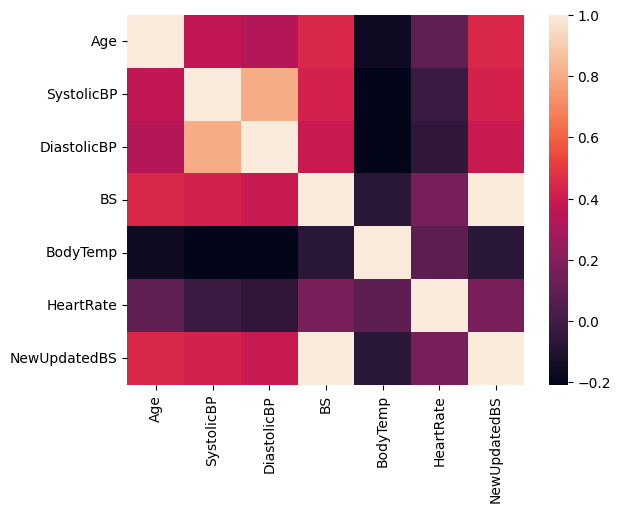

In [42]:
df.corr()
sns.heatmap(df.corr())

As we can see, the lighter the colour, the more correlation exists between the 2 columns. Therefore we can say that there is a statement that could be made between systolicBP and DiastolicBP

Statement below

0.8027784686478827


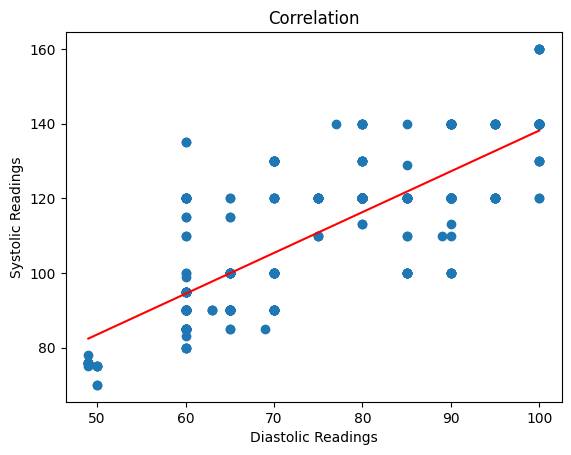

In [55]:
x_axis = df['DiastolicBP']
y_axis = df['SystolicBP']
correlation = y_axis.corr(x_axis)
print(correlation)
plt.scatter(x_axis, y_axis)

plt.plot(np.unique(x_axis), np.poly1d(np.polyfit(x_axis, y_axis, 1))
         (np.unique(x_axis)), color='red')

plt.title('Correlation')
plt.xlabel('Diastolic Readings')
plt.ylabel('Systolic Readings')
plt.show()

As you can see Diastolic blood pressure and Systolic blood pressure have a positive correlation. One could conclude that as Diastolic blood pressure increases Systolic blood pressure also increases.